In [39]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score
from math import sqrt

In [40]:
df = pd.read_csv('champagne.csv',parse_dates=True,index_col=0,header=0)

     

In [41]:
df

,Sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946
...,...
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298


In [42]:
df.head()

,Sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [43]:
df.tail()

,Sales
Month,
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298
1972-08-01,1413
1972-09-01,5877


In [44]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


In [45]:
df.isnull().sum()

Sales    0
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   105 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


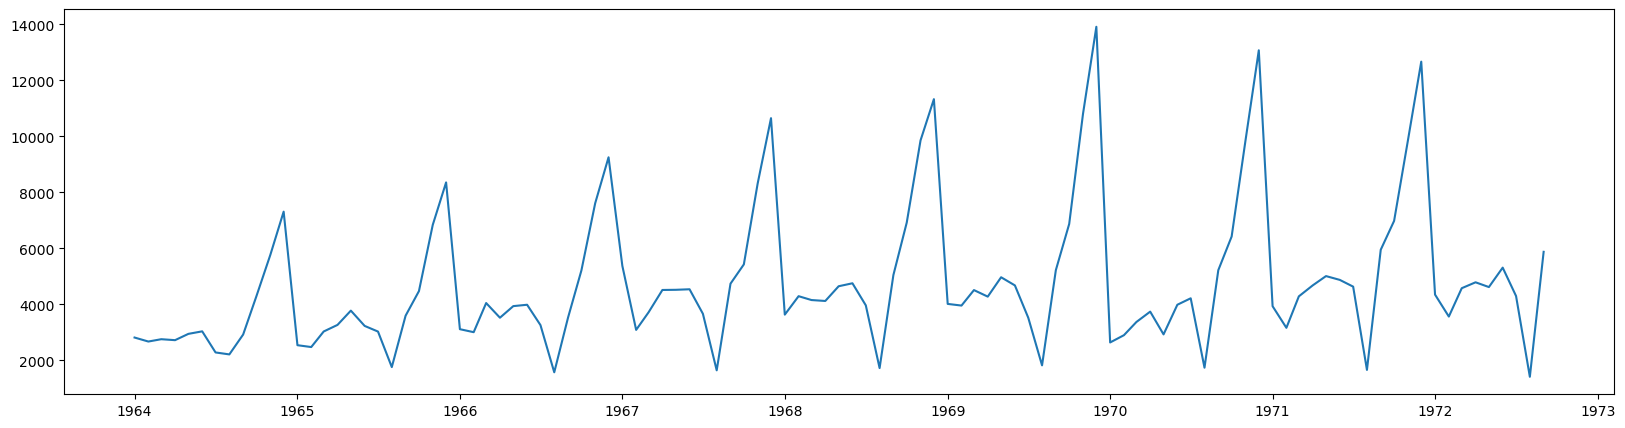

In [47]:
plt.figure(figsize=(20,5))
plt.plot(df)

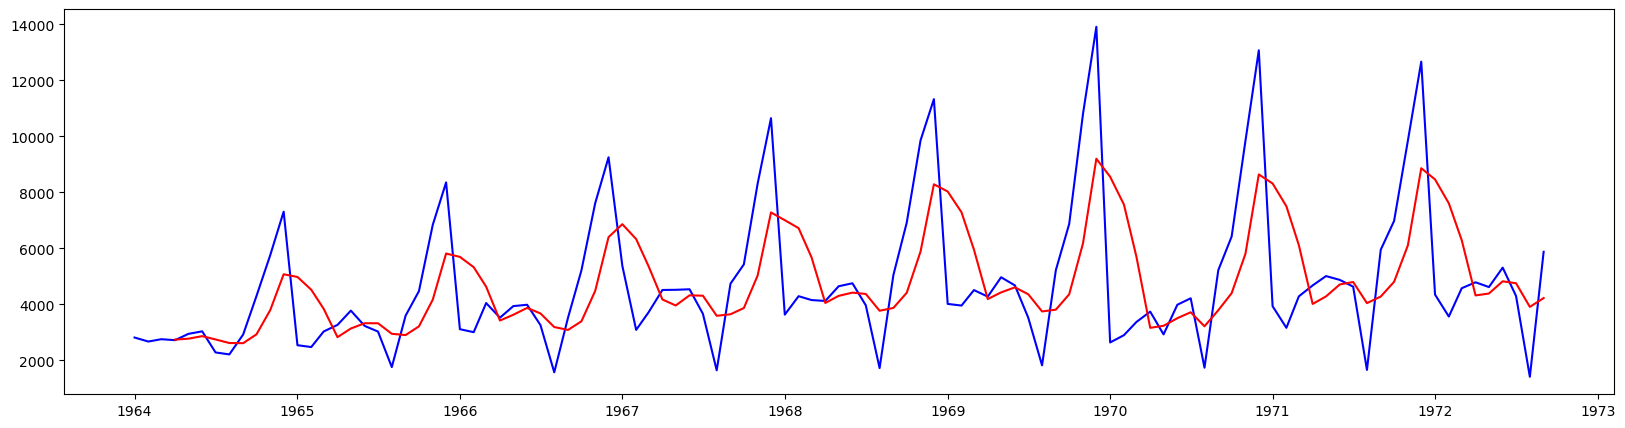

In [48]:
plt.figure(figsize=(20,5))
four_months_moving_average=df.rolling(window=4).mean()
plt.plot(df,color='blue')
plt.plot(four_months_moving_average,color='red')
plt.show()

<Axes: xlabel='Sales', ylabel='Density'>

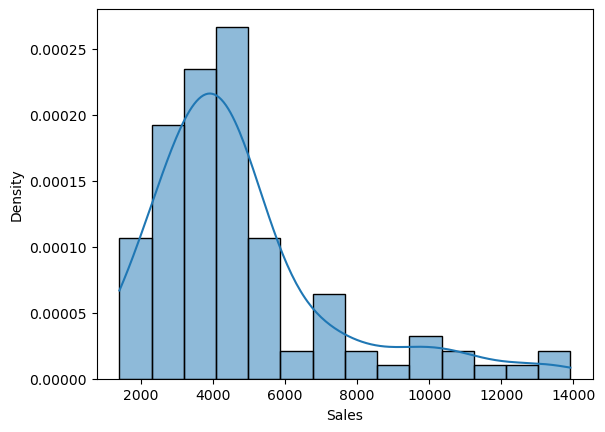

In [50]:
sns.histplot(df['Sales'],kde=True,stat='density')

<Figure size 640x480 with 0 Axes>

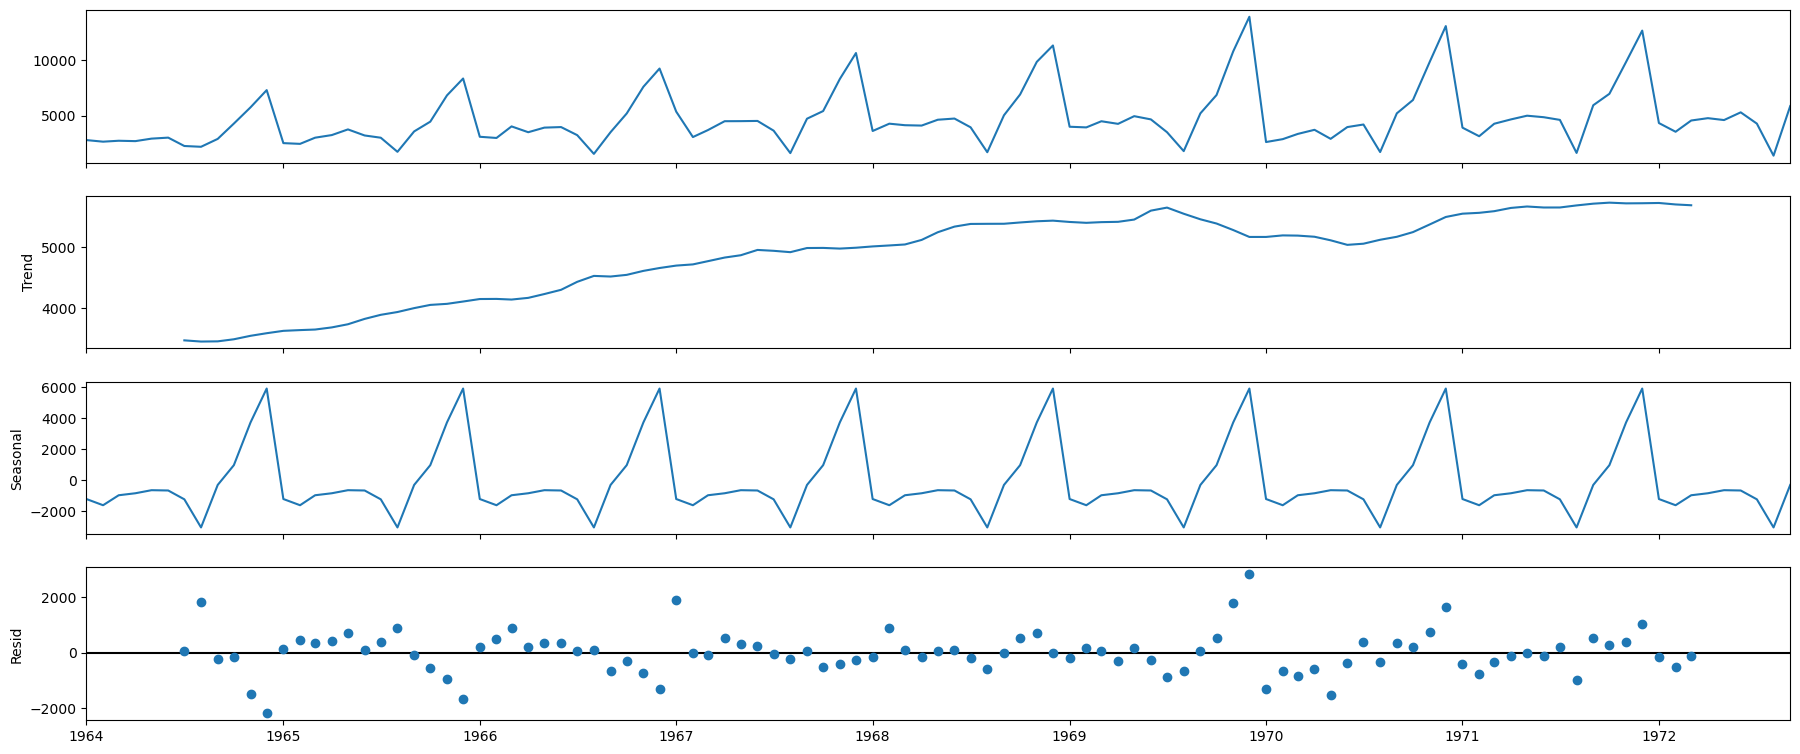

In [51]:
seasonal=seasonal_decompose(df,model='additive',period=12)
fig=plt.figure()
fig=seasonal.plot()
fig.set_size_inches(20,8)

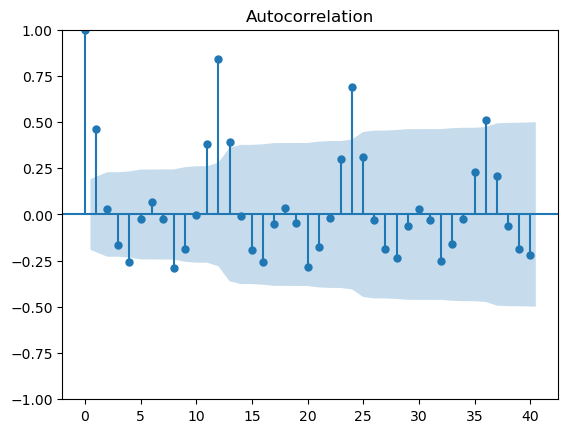

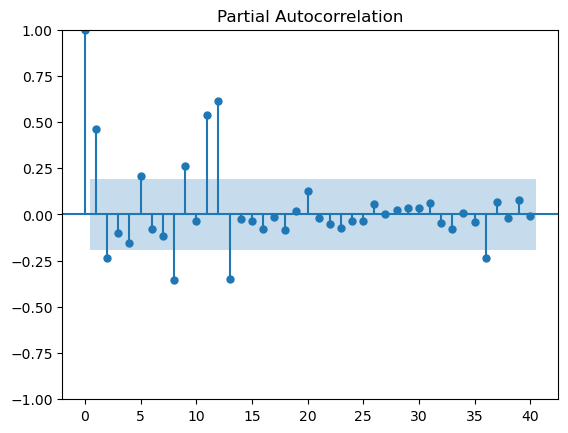

In [53]:
acf=plot_acf(df['Sales'],lags=40)
pacf=plot_pacf(df['Sales'],lags=40)

In [54]:
from statsmodels.tsa.stattools import adfuller

def adf_check(time_series):
    
    #Pass in a time series, returns ADF report

    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','Number of Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary \n")
     

In [55]:
adf_check(df)

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.833593056327623
p-value : 0.363915771660245
Number of Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 



In [56]:
train_size = (int)(0.8 * df.shape[0])



In [57]:
train = pd.DataFrame(df[0:train_size])
test = pd.DataFrame(df[train_size:df.shape[0]])


In [58]:
train

,Sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946
...,...
1970-08-01,1738
1970-09-01,5221
1970-10-01,6424


In [59]:
test

,Sales
Month,
1971-01-01,3934
1971-02-01,3162
1971-03-01,4286
1971-04-01,4676
1971-05-01,5010
1971-06-01,4874
1971-07-01,4633
1971-08-01,1659
1971-09-01,5951


In [68]:
test.shape

(21, 1)

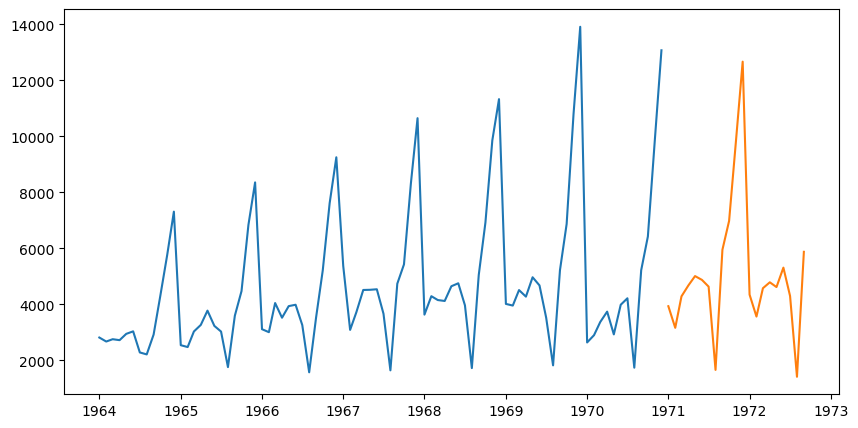

In [60]:
plt.figure(figsize=(10,5))
plt.plot(train)
plt.plot(test)

In [61]:
#BUILDING SARIMA MODEL

In [73]:
arima_model=auto_arima(train,start_p=0,d=1,start_q=0,
                      start_P=0,D=1,start_Q=0,
                      max_p=10,max_q=5,max_d=5,
                      max_P=3,max_Q=3,max_D=3,m=12,
                      seasonal=True,error_action='warn',
                      trace=True,supress_warnings=True,
                      stepwise=True,random_state=None,
                      n_fits=30)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1183.693, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1173.736, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1157.042, Time=0.11 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1155.109, Time=0.05 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1157.009, Time=0.10 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1158.348, Time=0.24 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1155.379, Time=0.07 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=1155.138, Time=0.06 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1173.612, Time=0.02 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1155.790, Time=0.11 sec
 ARIMA(0,1,1)(0,1,0)[12] intercept   : AIC=inf, Time=0.05 sec

Best model:  ARIMA(0,1,1)(0,1,0)[12]          
Total fit time: 0.883 seconds


In [63]:
pf=pd.DataFrame(arima_model.predict(n_periods=564),index=test.index)
pf.columns=['predicted_pasengers']
pf

,predicted_pasengers
Month,
1971-01-01,2260.640689
1971-02-01,2520.640689
1971-03-01,2991.640689
1971-04-01,3361.640689
1971-05-01,2548.640689
1971-06-01,3607.640689
1971-07-01,3838.640689
1971-08-01,1359.640689
1971-09-01,4842.640689


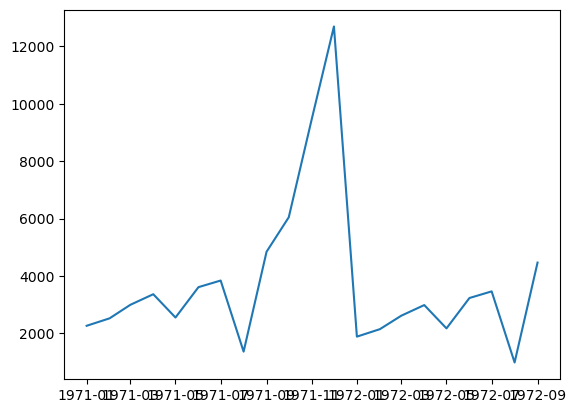

In [64]:
plt.plot(pf)

In [65]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   84
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                -575.554
Date:                             Tue, 12 Sep 2023   AIC                           1155.109
Time:                                     14:21:50   BIC                           1159.634
Sample:                                 01-01-1964   HQIC                          1156.908
                                      - 12-01-1970                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8756      0.060    -14.663      0.000      -0.993      -0.759
sigma2       5.86e+05   7.15e+04      8.195      0.000    4.46e+05    7.26e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 6.95
Prob(Q):                              0.69   Prob(JB):                         0.03
Heteroskedasticity (H):               2.13   Skew:                             0.01
Prob(H) (two-sided):                  0.07   Kurtosis:                         4.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

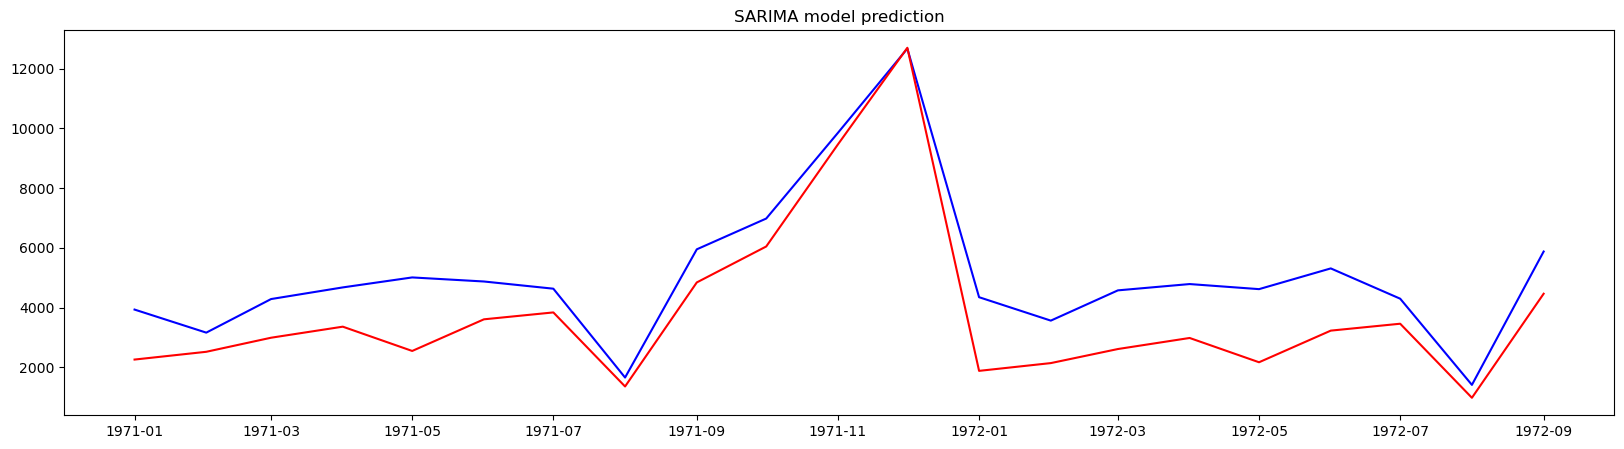

In [69]:
plt.figure(figsize=(20,5))
plt.plot(test,color='blue',label="Test")
plt.plot(pf,color='red',label="predicted")
plt.title('SARIMA model prediction')
plt.show()